### Download customer_example.csv from google drive, build a k-mean model on the dataset and interpret the result.

You need to:

1. load the data into pandas

2. build several models with different number of clusters

3. find the optimal number of clusters

4. interpret the result

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
% matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('customer_example.csv')

In [4]:
df.head()
df.shape
df.describe()   
df.dtypes

Satisfaction      int64
Loyalty         float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


### Standatdize

In [6]:
df.isnull().sum()

Satisfaction    0
Loyalty         0
dtype: int64

In [7]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [8]:
# X1 = df.values

### Create the scalar, Standardize the columns

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
features = ['Satisfaction', 'Loyalty']

In [11]:
x = df.loc[:, features].values

In [12]:
y = df.loc[:, ['Satisfaction']].values

In [13]:
x = StandardScaler().fit_transform(x)

In [14]:
x

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [15]:
y = StandardScaler().fit_transform(y)

In [16]:
y

array([[-0.93138063],
       [-0.15523011],
       [-0.54330537],
       [ 0.23284516],
       [-0.93138063],
       [-2.09560642],
       [ 1.39707095],
       [ 0.62092042],
       [ 0.62092042],
       [ 0.62092042],
       [ 1.39707095],
       [-0.54330537],
       [-0.54330537],
       [-1.70753116],
       [ 0.23284516],
       [ 1.00899568],
       [ 0.62092042],
       [ 0.23284516],
       [ 0.23284516],
       [ 1.00899568],
       [ 1.39707095],
       [-1.31945589],
       [-0.93138063],
       [-1.31945589],
       [-0.15523011],
       [ 1.00899568],
       [ 1.39707095],
       [ 1.00899568],
       [-1.31945589],
       [-0.54330537]])

In [19]:
from sklearn.cluster import KMeans   #Importing KMeans from sklearn and
k_inertia = []                       # Creating a list to store the kmeans.inertia_
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x)
    k_inertia.append(kmeans.inertia_)

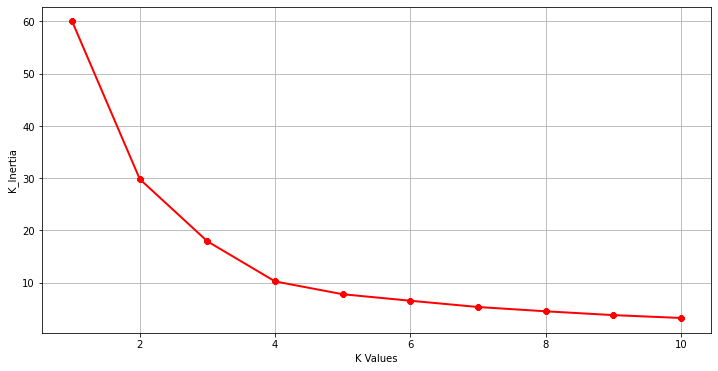

In [20]:
plt.figure(figsize=(12,6))

plt.grid()

plt.plot(range(1,11),k_inertia,linewidth = 2, color = "red", marker = "8")

plt.xlabel('K Values')

plt.ylabel("K_Inertia")

plt.show()

### 2. build several models with different number of cluster

### Fit the model
### Cluster is 2

In [21]:
kmeans = KMeans(n_clusters=2)

In [22]:
label = kmeans.fit_predict(x)
print(label) 

[0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1]


In [23]:
print(kmeans.cluster_centers_) 

[[-1.22243708 -1.12793693]
 [ 0.44452257  0.41015889]]


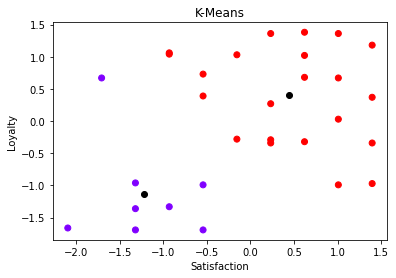

In [24]:
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color = 'black')
plt.title('K-Means')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty') 
plt.show()

### Interpretation

When cluster is 2, the data is grouped into two groups. 

### Cluster is 3

In [26]:
kmeans = KMeans(n_clusters=3)

In [27]:
label = kmeans.fit_predict(x)
print(label)

[0 1 0 1 2 0 1 1 1 1 1 2 0 2 1 1 1 2 1 1 1 0 2 0 2 1 1 1 0 2]


In [28]:
print(kmeans.cluster_centers_)

[[-1.15313792 -1.38470045]
 [ 0.79070335  0.21350503]
 [-0.65418401  0.89668896]]


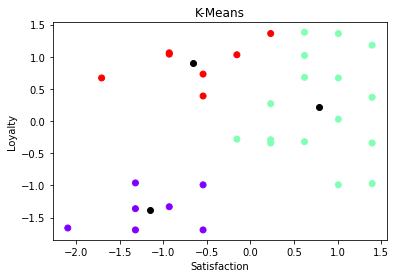

In [29]:
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color = 'black')
plt.title('K-Means')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty') 
plt.show()

Interpretation

### Cluster is 4

In [30]:
kmeans = KMeans(n_clusters=4)

In [31]:
label = kmeans.fit_predict(x)
print(label)

[0 3 0 3 2 0 3 3 1 1 3 2 0 2 3 1 1 1 3 1 1 0 2 0 2 3 1 3 0 2]


In [32]:
print(kmeans.cluster_centers_)

[[-1.15313792 -1.38470045]
 [ 0.86346746  1.0021103 ]
 [-0.80202221  0.81949909]
 [ 0.66403989 -0.3601082 ]]


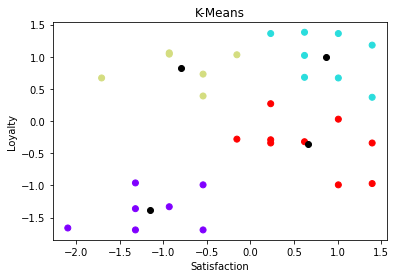

In [33]:
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color = 'black')
plt.title('K-Means')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty') 
plt.show()

Interpretation

### To find the optimal value of clusters, the elbow method follows the below steps:
1 Execute the K-means clustering on a given dataset for different K values (ranging from 1-10).

2 For each value of K, calculates the WCSS value.

3 Plots a graph/curve between WCSS values and the respective number of clusters K.

4 The sharp point of bend or a point( looking like an elbow joint ) of the plot like an arm, will be considered as the best/optimal value of K

In [35]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(x)

KMeans(max_iter=600, n_clusters=2)

In [36]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=2, n_jobs=1, precompute_distances='auto')

In [40]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.0


In [41]:
kmeans = kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(x)

KMeans(max_iter=600, n_clusters=3)

In [42]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(max_iter=600, n_clusters=2, n_jobs=1, precompute_distances='auto')

In [43]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.0


### k-means clustering is very sensitive to scale due to its reliance on Euclidean distance so be sure to normalize data if there are likely to be scaling problems.
If there are some symmetries in your data, some of the labels may be mis-labelled
It is recommended to do the same k-means with different initial centroids and take the most common label.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

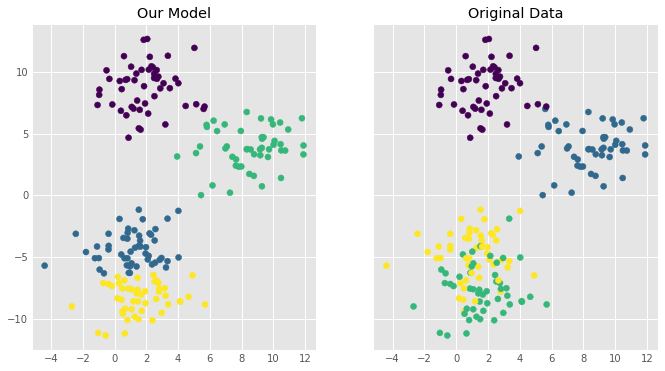

In [134]:
#PLot the predictions against the original data set

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])